<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/008_data_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.03.30 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting - EDA**

### Contents

1. Input Data
2. EDA
3. Seasonal-Trend Decomposition
4. Deflating
5. Distribution of Average Monthly Revenues (2023.06.16)

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Input Data**


In [ ]:
# Data path
input_data_path = '/content/gdrive/Shareddrives/Me/論文/資料集/007_v1'

### **1.1 月營收資料**

【**月營收盈餘 (2015-2022)**】

資料期間：2015年1月至2022年12月（共96個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data = pd.read_excel(os.path.join(input_data_path, '201501-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719,4823318,7695107,8468346,7989971,8545853,8250361,7397417,7026214,8081068,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6851825,3279346,5274419,5767824,5623713,5516532,5746639,5512417,5546527,5901983,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,310280,160324,200719,273126,320563,143719,175596,184087,189109,321446,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,520536,335531,471332,447811,371720,411286,412816,376087,423675,461991,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,518826,341533,431529,432670,471084,441613,463001,329405,340734,396102,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990,251041,279617,333189,321941,300731,289975,300810,347401,333945,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,301850,131575,325762,152812,262623,193277,102874,172944,172431,177217,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,200493,217812,272212,194423,235272,271207,184345,272110,256634,282106,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1308, 96)
Data size: 125568


【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data13 = pd.read_excel(os.path.join(input_data_path, '201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data13.columns = pd.to_datetime(org_data13.columns, format="%Y-%m-%d").to_period('M')
org_data13

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data13.shape)
print("Data size:", org_data13.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 通信網路業 (Communications)**

【**通信網路業-月營收盈餘**】

資料期間：2002年1月至2022年12月（共252個月）

資料範圍：上市、櫃公司（排除DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
communications = pd.read_excel(os.path.join(input_data_path, '200201-202212上市櫃公司月營收_通信網路業.xlsx'), index_col=0)
communications.columns = pd.to_datetime(communications.columns,format="%Y-%m-%d").to_period('M')
communications

,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
2314 台揚,200185,219179,320565,316991,278873,289556,276480,323568,402520,324067,...,388750,337985,353626,334978,421381,431594,448085,400957,410812,408807
2321 東訊,601938,500766,652376,605152,732126,752440,768631,770670,791223,724319,...,92540,85007,86836,90248,76205,90190,80035,65974,81973,81299
2332 友訊,1593241,1101455,1340046,1178485,1301377,1149293,1178419,1456867,1523637,1521610,...,1543114,1293585,1389326,1474090,1404034,1447895,1633066,1560899,1546963,1313864
2345 智邦,1404236,1410164,1468723,1450569,1315885,1151603,1210294,1307091,1510895,1515915,...,6749720,5625973,6156162,6914045,6840989,6391814,7348530,6610791,6817141,8770217
2412 中華電,14684335,14773959,13017734,14767374,14227480,14794304,14667474,15781728,15233415,14498562,...,17323389,17602247,17445703,17387760,17184646,17337298,18986768,19230091,19309438,20961444
2419 仲琦,174049,153933,236625,103103,211497,288336,255922,162417,380930,315423,...,908498,779427,887599,1374598,937781,1018128,1206809,1156453,1139484,1379441
2439 美律,63506,54579,72553,55635,48128,66725,130000,62837,77622,145000,...,2189938,2113643,2866873,3033457,3290225,3716353,4074768,4224308,3124607,3032043
2444 兆勁,301506,217104,351221,300591,395498,349296,314932,212805,234230,283007,...,183595,157899,128549,109197,113399,150337,141019,186453,240203,193234
2450 神腦,847340,926119,1100852,984768,1092556,835336,1063034,1349116,1088702,1085038,...,2898335,2422175,2291321,2258342,2393763,2512334,2718019,2869190,2827687,2795633


In [ ]:
print("Data shape:", communications.shape)
print("Data size:", communications.size)

Data shape: (51, 252)
Data size: 12852


## **2. EDA**

In [ ]:
# Plot the mean and the standard deviation of monthly revenues
def plotMeanStd(data: pd.DataFrame, details: str, figure_x: int):
    org_mean = data.mean(axis=0)
    org_std = data.std(axis=0)

    # Average
    plt.figure(figsize = (figure_x, 4))
    plt.title(f"Average of Monthly Revenues ({details})", size = 14)
    plt.plot(org_mean.index.to_series().astype(str), org_mean.values)
    plt.xticks(range(0, len(org_mean.index), 2), org_mean.index[::2], rotation=90)
    plt.show()

    # Standard Deviation
    plt.figure(figsize = (figure_x, 4))
    plt.title(f"Standard Deviation of Monthly Revenues ({details})", size = 14)
    plt.plot(org_std.index.to_series().astype(str), org_std.values)
    plt.xticks(range(0, len(org_std.index), 2), org_std.index[::2], rotation =90)
    plt.show()

### **2.1 月營收資料**

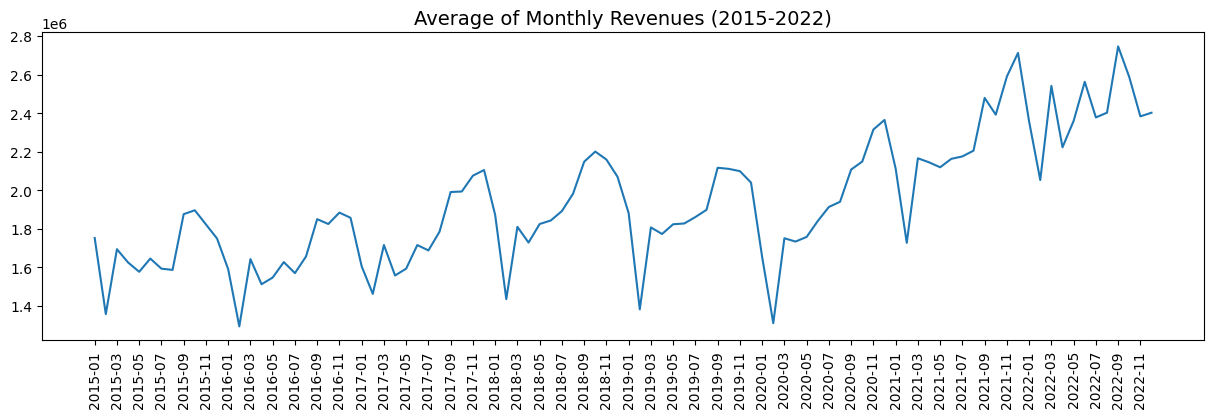

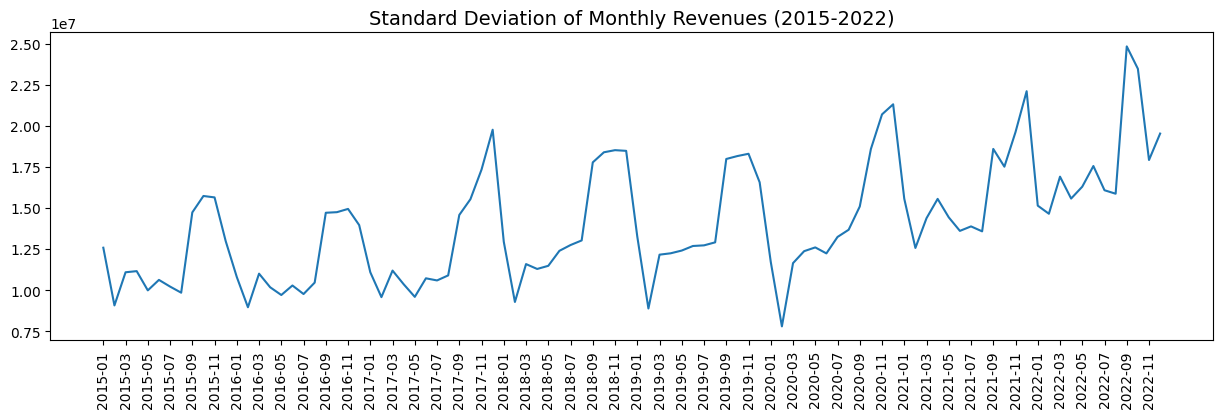

In [ ]:
# 2015
plotMeanStd(org_data, '2015-2022', 15)

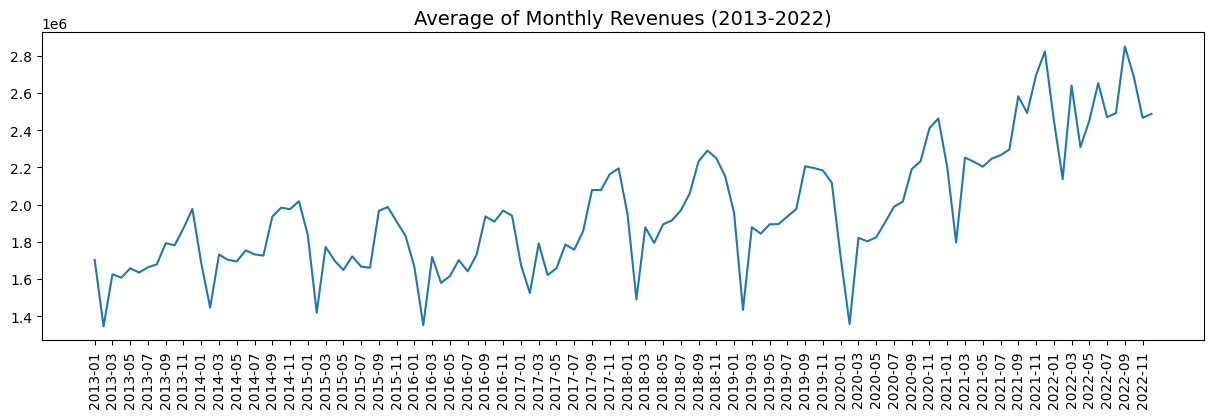

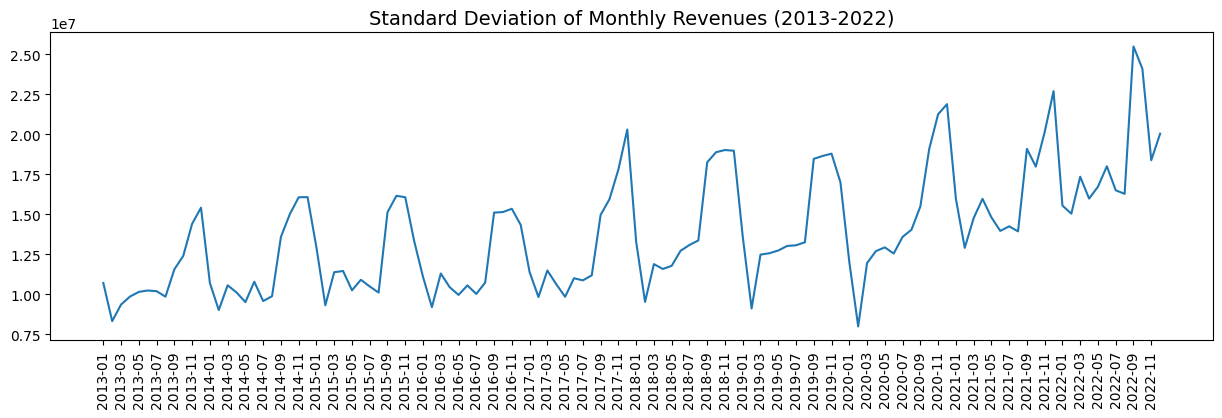

In [ ]:
# 2013
plotMeanStd(org_data13, '2013-2022', 15)

### **2.2 通信網路業**

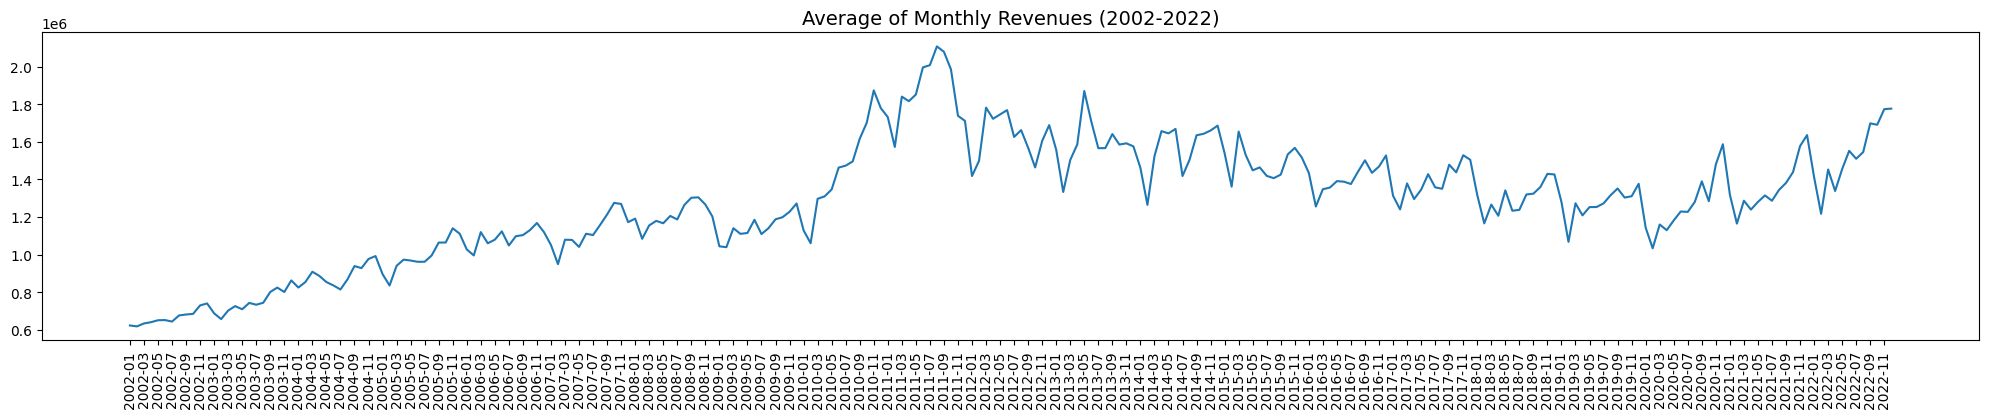

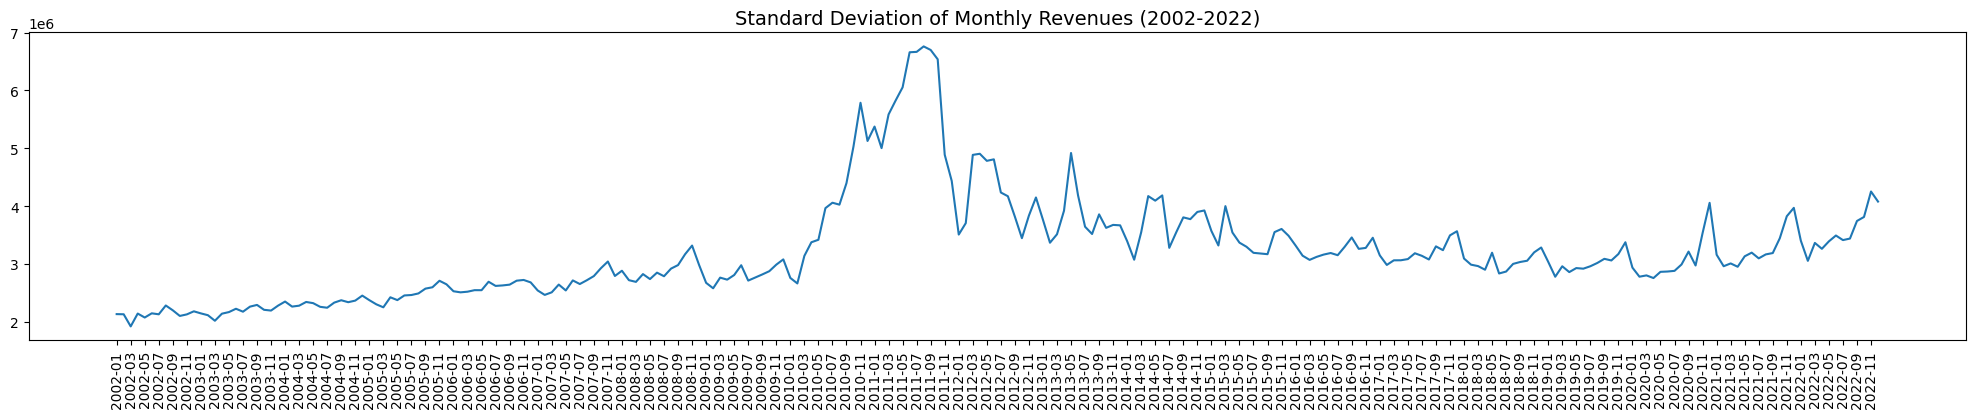

In [ ]:
plotMeanStd(communications, '2002-2022', 25)

## **3. Seasonal-Trend Decomposition**

Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

In [ ]:
from statsmodels.tsa.seasonal import STL

# 將整體資料集拆解為 trend, seasonal, residual
def decomposeCompleteData(data: pd.DataFrame):
    decomposed_trend = pd.DataFrame(index=data.index, columns=data.columns)
    decomposed_seasonal = pd.DataFrame(index=data.index, columns=data.columns)
    decomposed_residual = pd.DataFrame(index=data.index, columns=data.columns)

    for index, row in data.iterrows():
        decomposed_row = STL(row.to_numpy(), period=12, seasonal=13).fit()
        decomposed_trend.loc[index] = np.round(decomposed_row.trend, 4)
        decomposed_seasonal.loc[index] = np.round(decomposed_row.seasonal, 4)
        decomposed_residual.loc[index] = np.round(decomposed_row.resid, 4)

    return decomposed_trend, decomposed_seasonal, decomposed_residual


# Plot
def plotDecomposedData(title: str, data: pd.DataFrame, figure_x: int):
    data_mean = data.mean(axis=0)
    plt.figure(figsize = (figure_x,4))
    plt.title(title, size = 14)
    plt.plot(data_mean.index.to_series().astype(str), data_mean.values)
    plt.xticks(range(0, len(data_mean.index), 2), data_mean.index[::2], rotation = 90)
    if (title == 'Seasonal') | (title == 'Residual'):
        plt.axhline(0, color = 'grey', ls = '--', alpha = 0.8) # 添加水平線於 y = 0 的地方
    plt.show()

### **3.1 月營收資料**

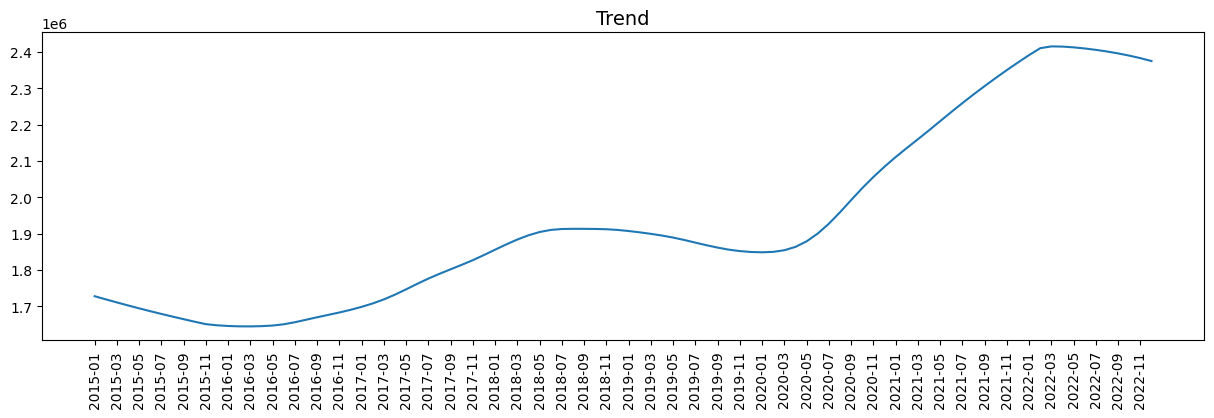

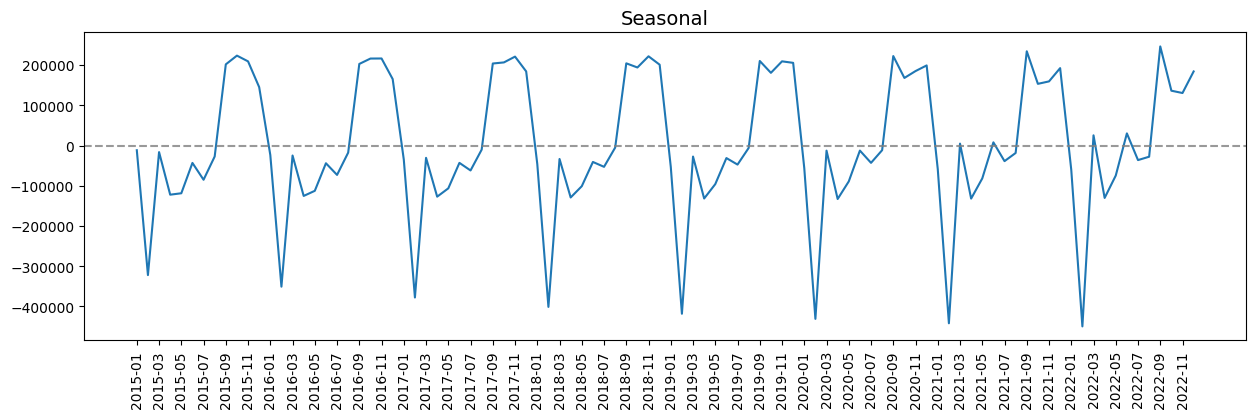

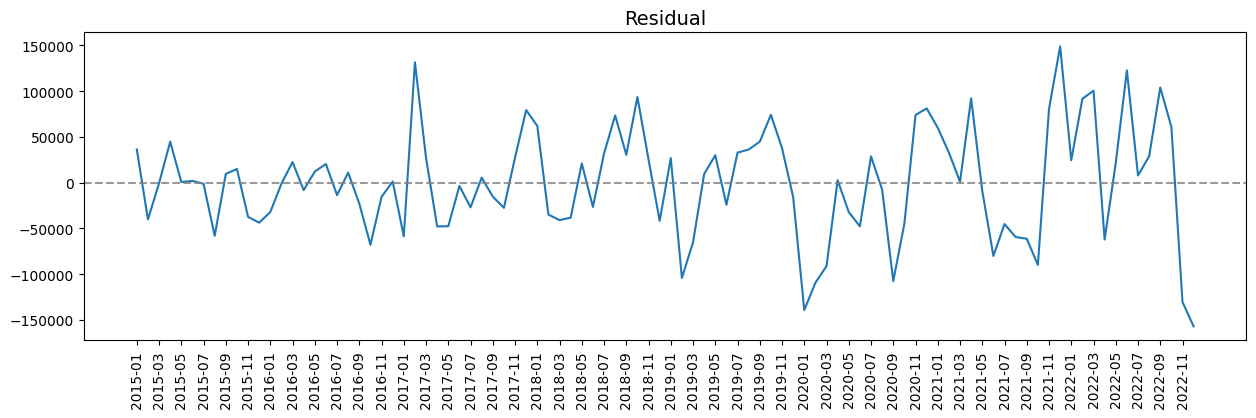

In [ ]:
# 2015
complete_trend, complete_season, complete_resid = decomposeCompleteData(org_data)

# Plot
plotDecomposedData('Trend', complete_trend, 15)
plotDecomposedData('Seasonal', complete_season, 15)
plotDecomposedData('Residual', complete_resid, 15)

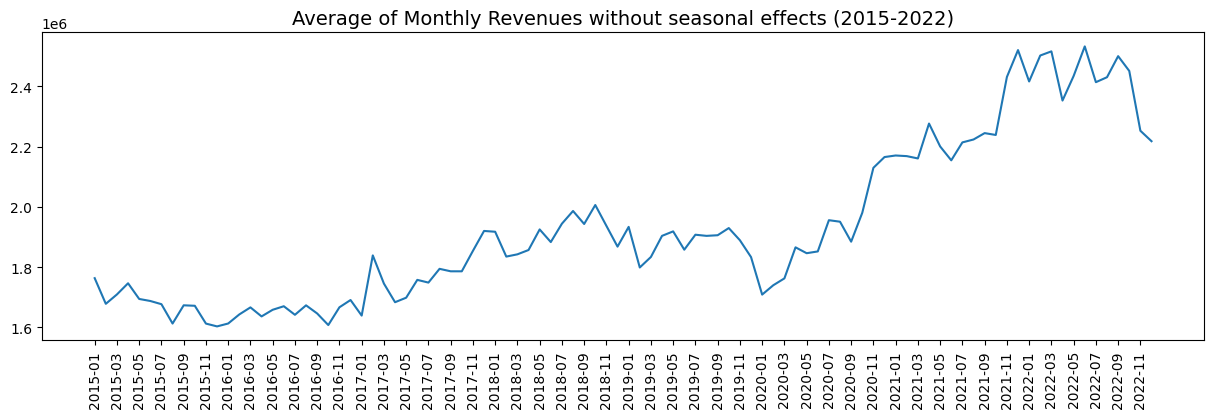

In [ ]:
# 消除季節變動因子
data_nonseasonal = org_data - complete_season
plotDecomposedData('Average of Monthly Revenues without seasonal effects (2015-2022)', data_nonseasonal, 15)

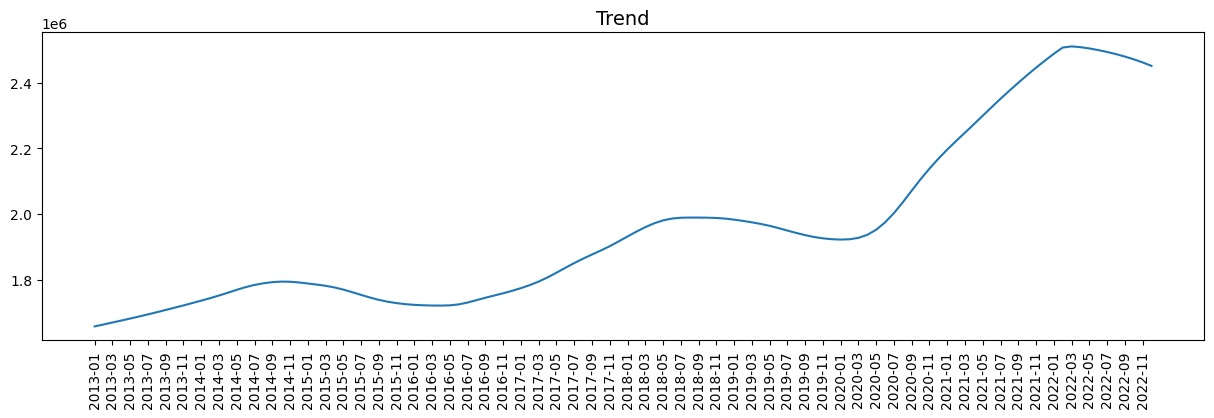

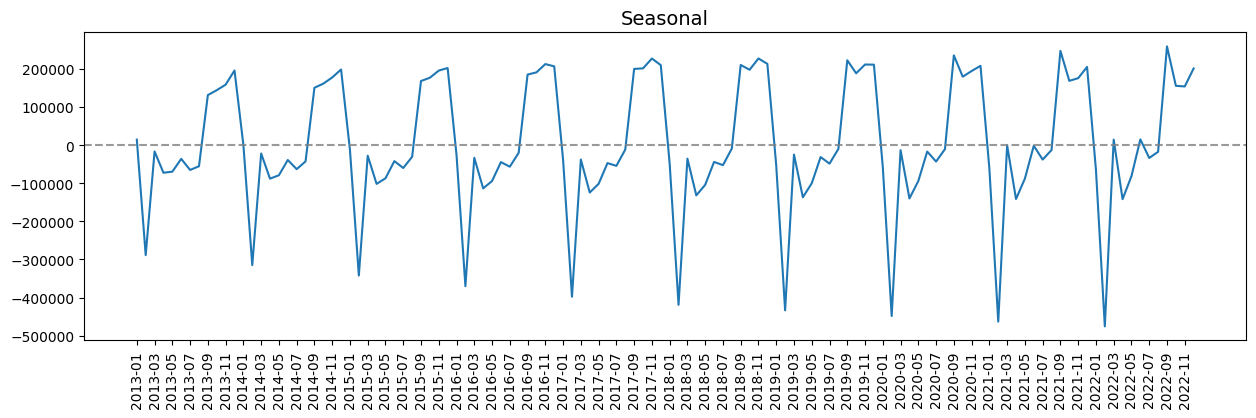

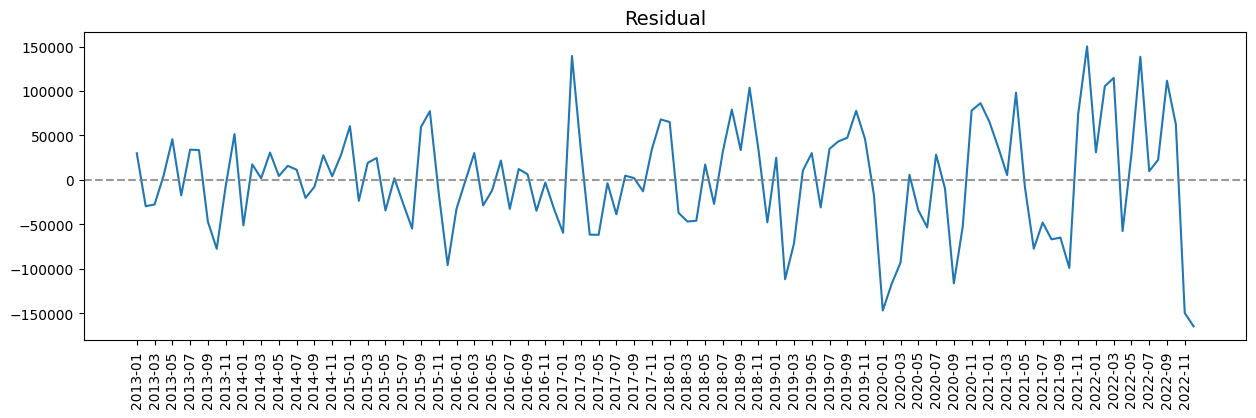

In [ ]:
# 2013
complete_trend13, complete_season13, complete_resid13 = decomposeCompleteData(org_data13)

# Plot
plotDecomposedData('Trend', complete_trend13, 15)
plotDecomposedData('Seasonal', complete_season13, 15)
plotDecomposedData('Residual', complete_resid13, 15)

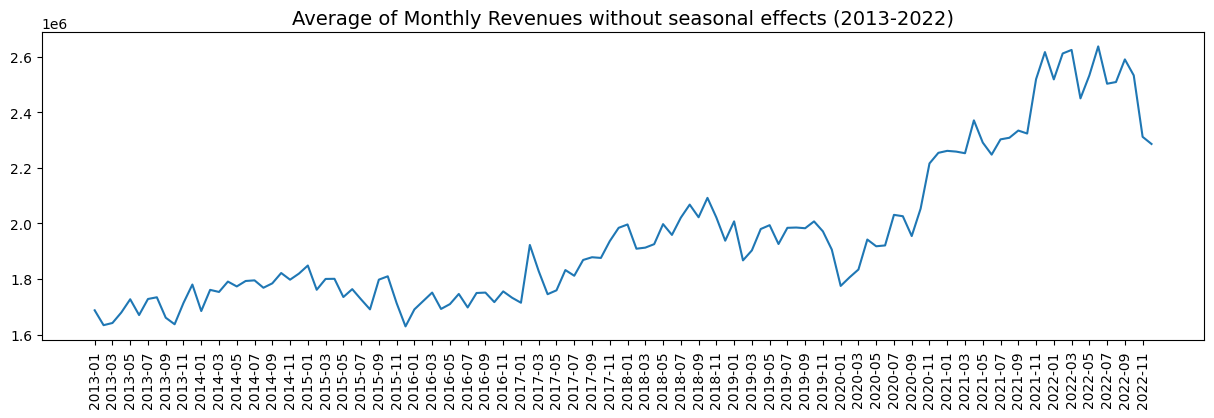

In [ ]:
# 消除季節變動因子
data_nonseasonal13 = org_data13 - complete_season13
plotDecomposedData('Average of Monthly Revenues without seasonal effects (2013-2022)', data_nonseasonal13, 15)

### **3.2 通信網路業**

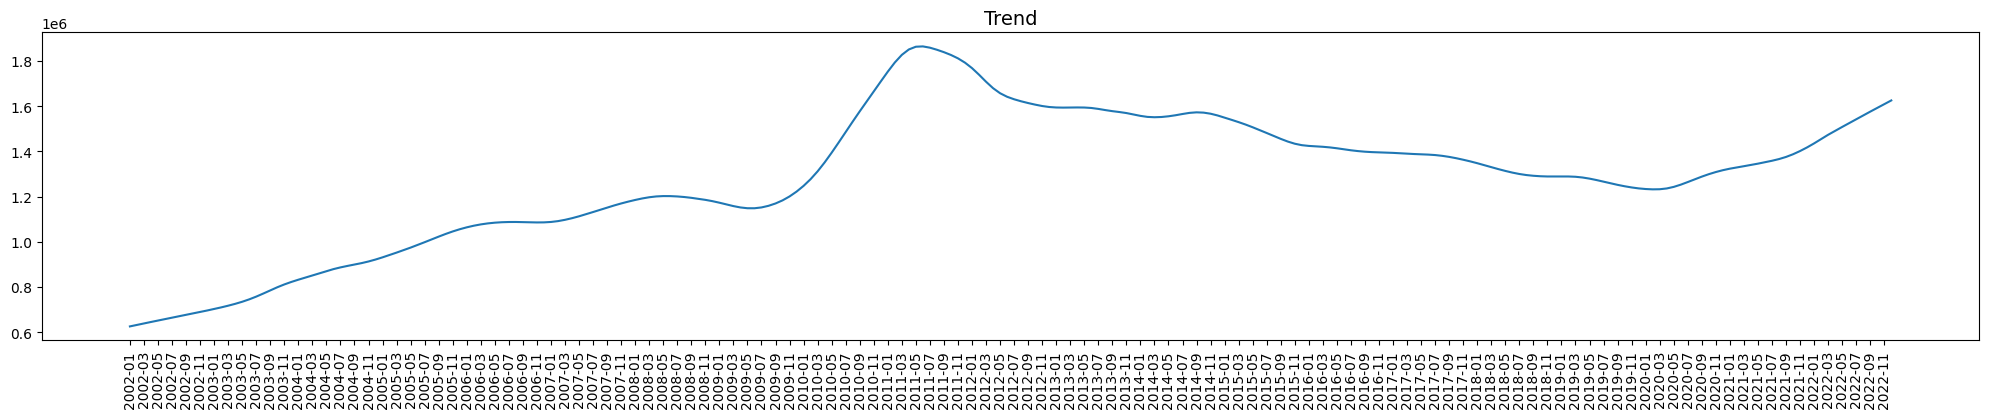

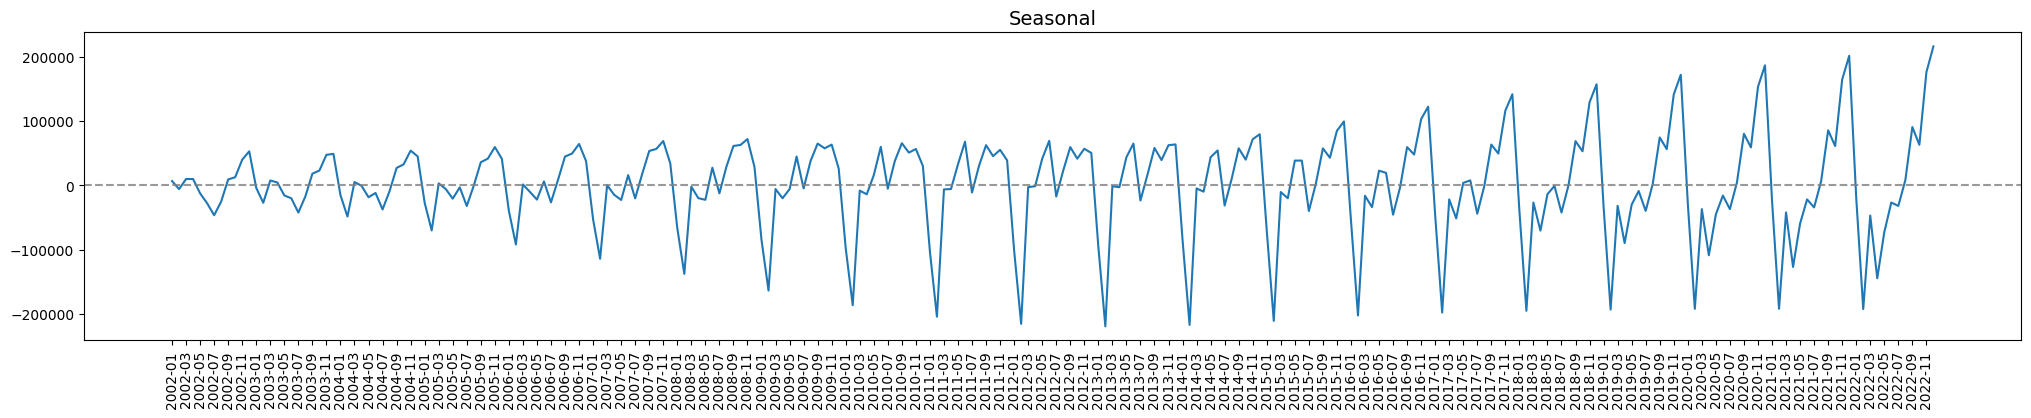

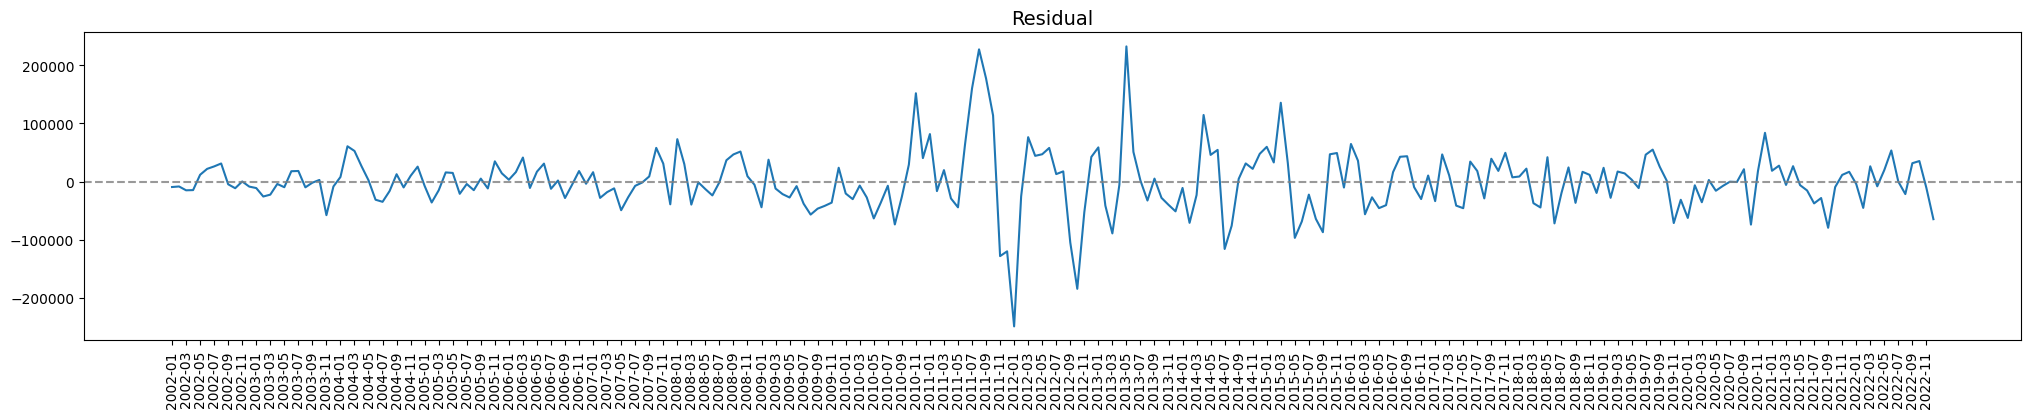

In [ ]:
communications_trend, communications_season, communications_resid = decomposeCompleteData(communications)

# Plot
plotDecomposedData('Trend', communications_trend, 25)
plotDecomposedData('Seasonal', communications_season, 25)
plotDecomposedData('Residual', communications_resid, 25)

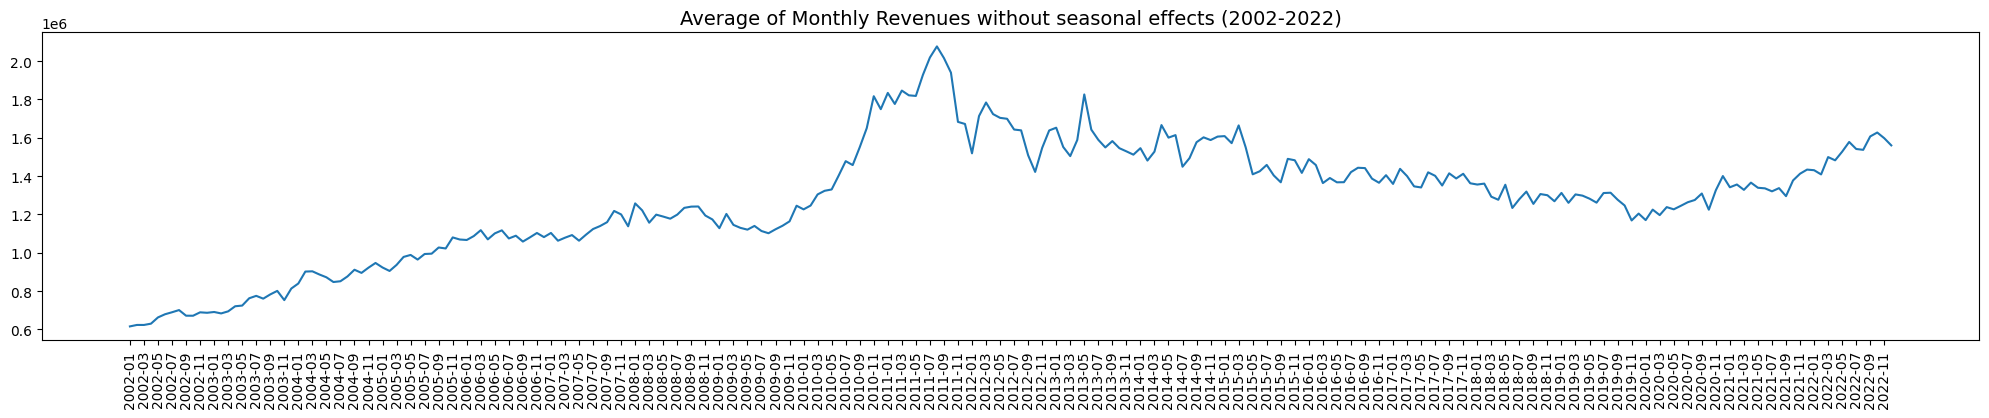

In [ ]:
# 消除季節變動因子
communications_nonseasonal = communications - communications_season
plotDecomposedData('Average of Monthly Revenues without seasonal effects (2002-2022)', communications_nonseasonal, 25)

## **4. Deflating**

### **4.1 月營收資料**

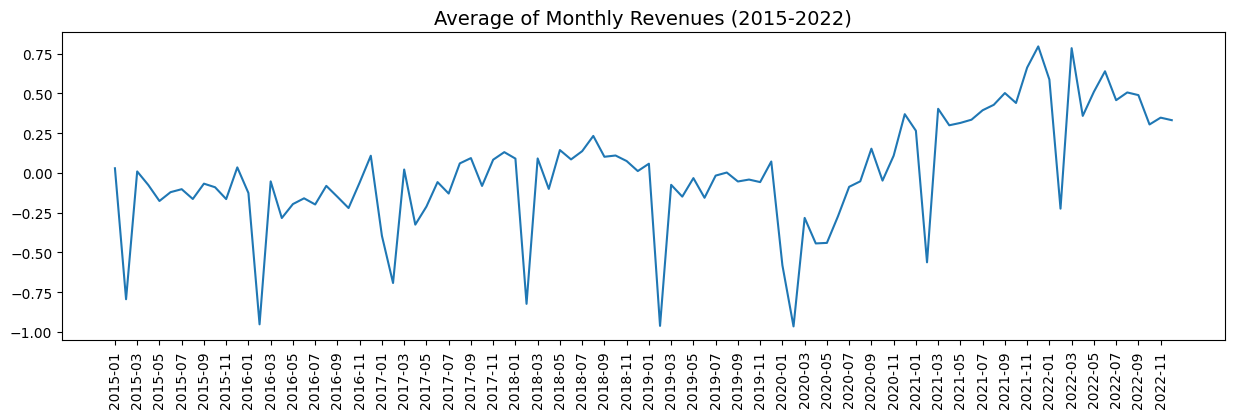

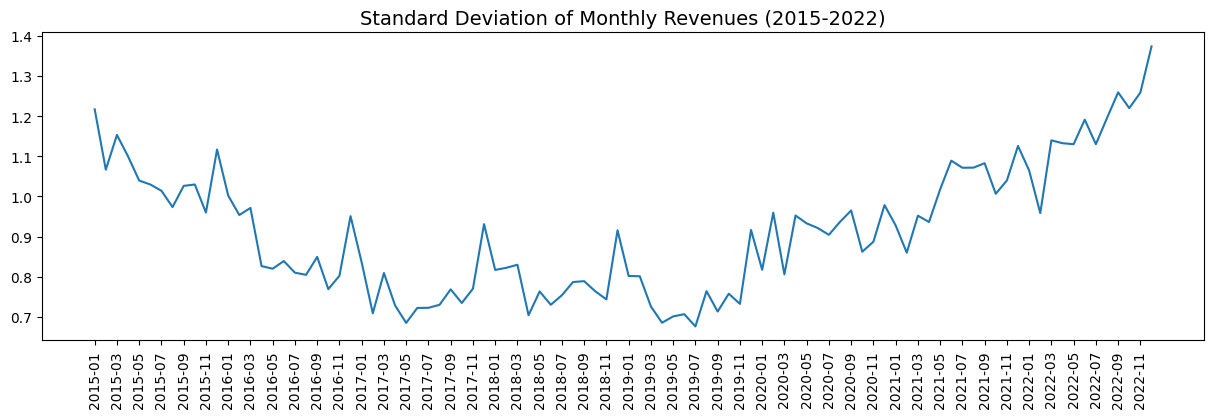

In [ ]:
# 2015
std_data = org_data.apply(lambda row: (row-org_data.mean(axis=1)[row.name])/org_data.std(axis=1)[row.name], axis=1)
plotMeanStd(std_data, '2015-2022', 15)

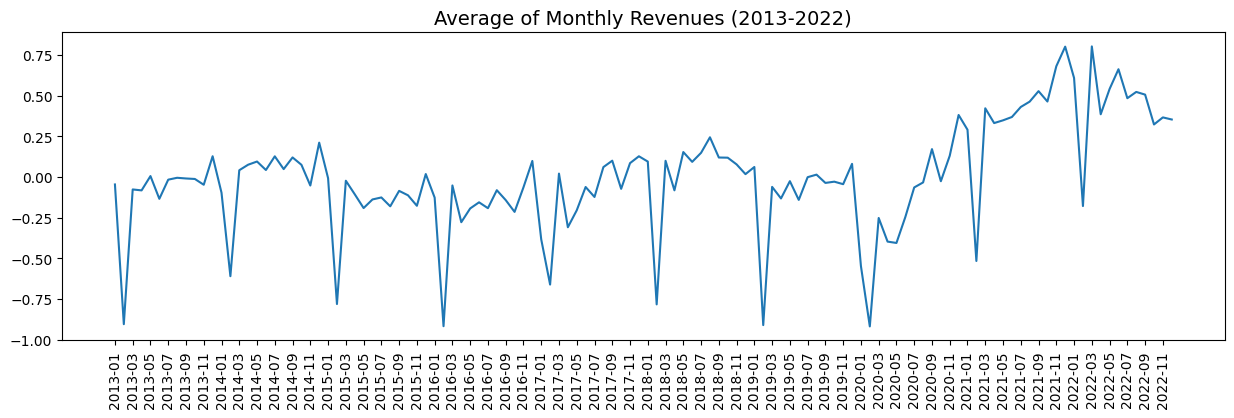

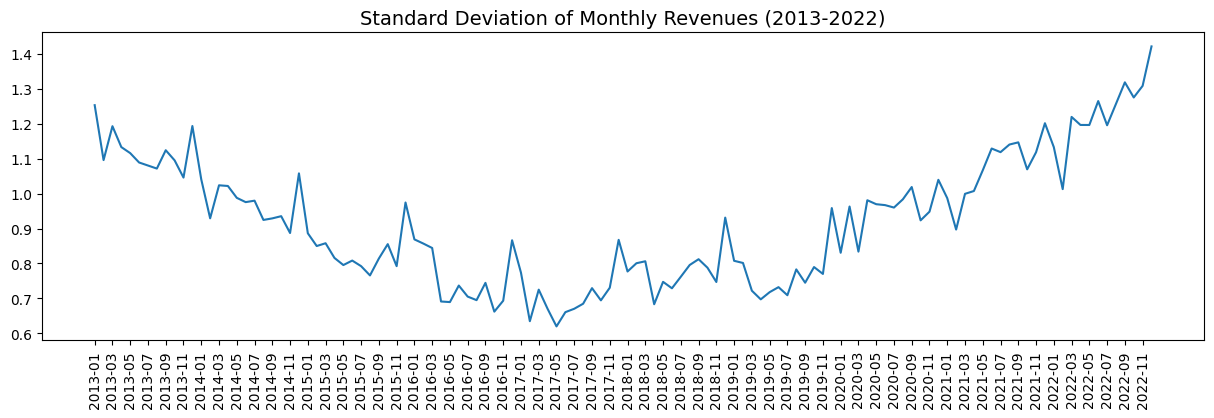

In [ ]:
# 2013
std_data13 = org_data13.apply(lambda row: (row-org_data13.mean(axis=1)[row.name])/org_data13.std(axis=1)[row.name], axis=1)
plotMeanStd(std_data13, '2013-2022', 15)

### **4.2 通信網路業**

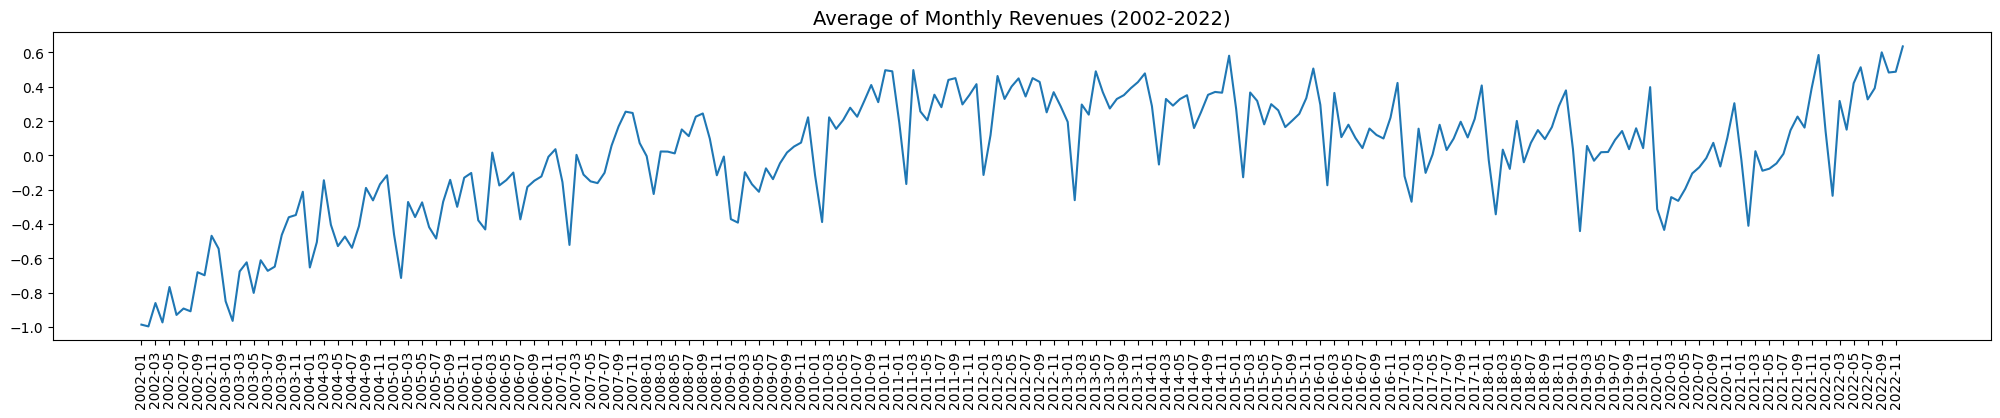

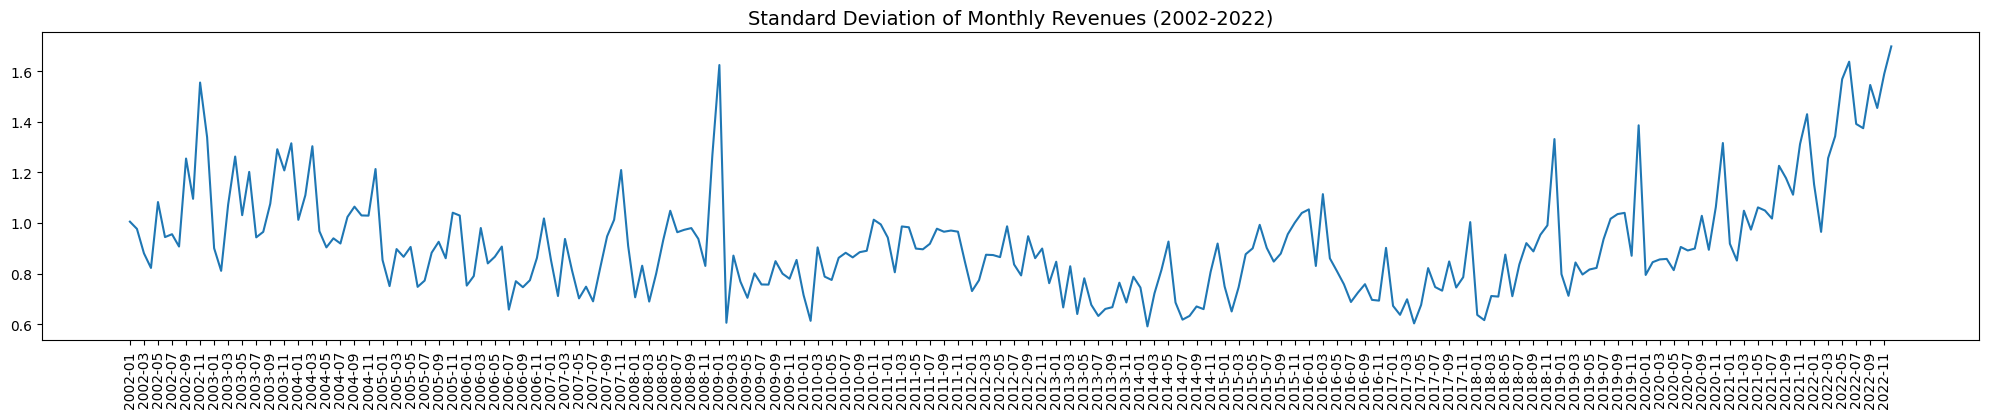

In [ ]:
std_communications = communications.apply(lambda row: (row-communications.mean(axis=1)[row.name])/communications.std(axis=1)[row.name], axis=1)
plotMeanStd(std_communications, '2002-2022', 25)

## **5. Distribution of Average Monthly Revenues**

2023.06.16

### **5.1 Quartile**

In [ ]:
def show_statistics(values):
    statistics = {
        'mean': np.mean(values),
        'std': np.std(values),
        'min': np.min(values),
        '25%': np.percentile(values, 25),
        '50%': np.median(values),
        '75%': np.percentile(values, 75),
        'max': np.max(values)
    }

    print("Size:", len(values))
    display(statistics)

In [ ]:
show_statistics(round(org_data13.mean(axis=1), 0).values)

Size: 1240


{'mean': 1958683.7379032257,
 'std': 13669633.52938587,
 'min': 1991.0,
 '25%': 106233.0,
 '50%': 251112.0,
 '75%': 761949.75,
 'max': 419353981.0}

### **5.2 Histogram**

In [ ]:
def plotDistribution(data: pd.DataFrame, details: str, figure_x: int):
    org_mean = round(data.mean(axis=1), 0)
    plt.figure(figsize = (figure_x, 4))
    plt.title(f"Distribution of Average Monthly Revenues ({details})", size = 14)
    plt.hist(org_mean.values)
    plt.show()

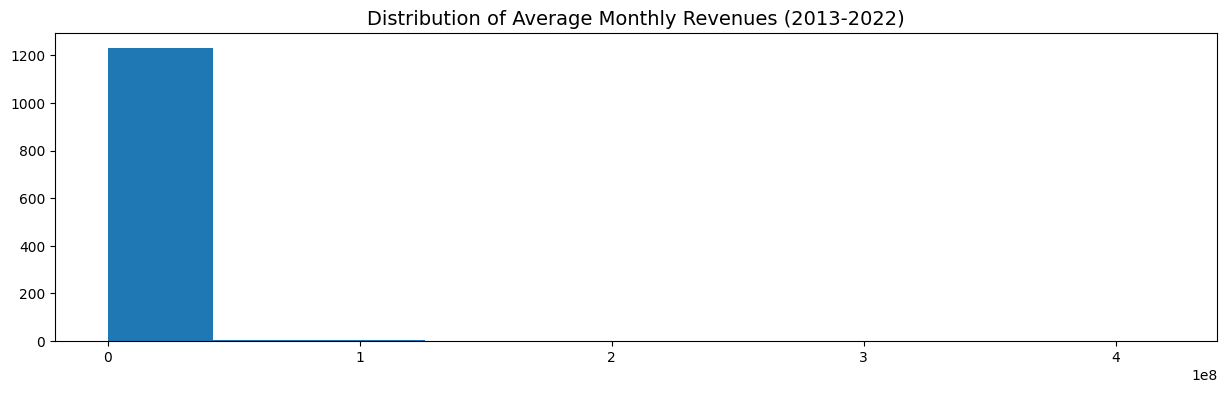

In [ ]:
# 2013
plotDistribution(org_data13, '2013-2022', 15)

### **5.3 Scatter Plot**

In [ ]:
org_data13_mean = pd.DataFrame(round(org_data13.mean(axis=1), 0), columns = ['Avg'])

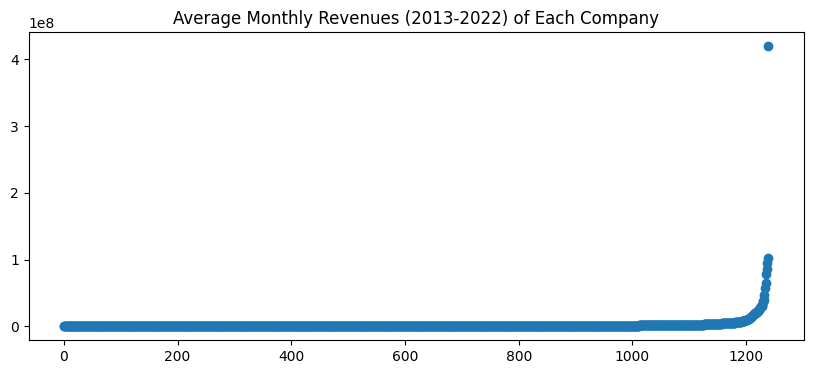

In [ ]:
plt.figure(figsize = (10, 4))
plt.scatter(range(0, org_data13_mean.shape[0]), org_data13_mean['Avg'].sort_values())
plt.title("Average Monthly Revenues (2013-2022) of Each Company")
plt.show()

### **5.4 Categorize**

In [ ]:
category_range = [100000, 1000000, 5000000, 10000000, 100000000]
category_labels = [f'<= {category_range[0]}', f'<= {category_range[1]}', f'<= {category_range[2]}', f'<= {category_range[3]}', f'<= {category_range[4]}', f'> {category_range[4]}']

In [ ]:
org_data13_mean['Category'] = np.where(org_data13_mean['Avg'] <= category_range[0], '0',
                                       np.where(org_data13_mean['Avg'] <= category_range[1], '1',
                                                np.where(org_data13_mean['Avg'] <= category_range[2], '2',
                                                         np.where(org_data13_mean['Avg'] <= category_range[3], '3',
                                                                  np.where(org_data13_mean['Avg'] <= category_range[4], '4',
                                                                           '5')))))
org_data13_mean

,Avg,Category
公司,,
1101 台泥,9156420.0,3
1102 亞泥,6421826.0,3
1103 嘉泥,223116.0,1
1104 環泥,446960.0,1
1108 幸福,351227.0,1
...,...,...
9951 皇田,381131.0,1
9955 佳龍,196660.0,1
9958 世紀鋼,359383.0,1


In [ ]:
org_data13_mean.to_excel('/content/gdrive/Shareddrives/Me/論文/code/preprocessing/org_data13_revenue_category.xlsx')

In [ ]:
# Count numbers in each category
org_data13_cate = pd.DataFrame(org_data13_mean['Category'].value_counts().sort_index())
org_data13_cate.index = category_labels
org_data13_cate

,Category
<= 100000,292
<= 1000000,694
<= 5000000,188
<= 10000000,29
<= 100000000,35
> 100000000,2


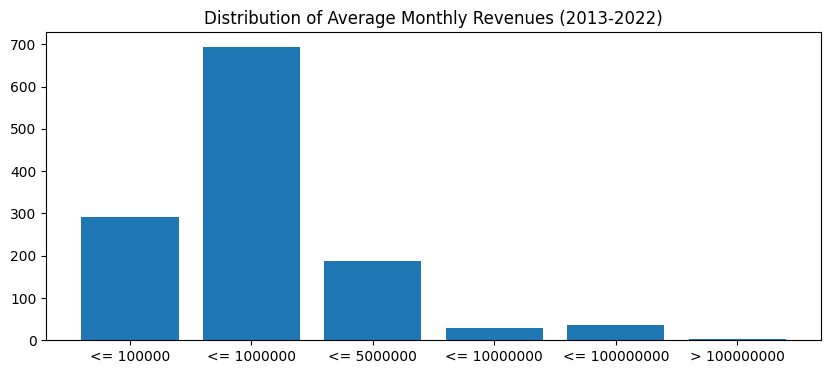

In [ ]:
# Plot
plt.figure(figsize = (10, 4))
plt.bar(org_data13_cate.index, org_data13_cate['Category'])
plt.title("Distribution of Average Monthly Revenues (2013-2022)")
plt.show()